In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


%matplotlib inline

from pycaret.anomaly import *

from pycaret.regression import *

In [20]:
df=pd.read_csv(r'C:\Users\marci\DataScience\Pitch_predictions\pitch-aileron\train.csv')

In [21]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3600, 19)
Unseen Data For Predictions: (400, 19)


In [22]:
df_T = df.drop('Target', axis=1)

In [23]:
s = setup(df, target = 'Target')

In [24]:
best = compare_models( sort = 'RMSLE', fold = 30)

In [25]:
lgbm = create_model('lightgbm')

print(lgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=4526, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [26]:
br = create_model('br')

print('br')

br


In [27]:
lr = create_model('lr')

print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [28]:
lgbm_params = {'num_leaves': np.arange(10,200,1),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }


In [29]:
tuned_lightgbm = tune_model(lgbm, custom_grid = lgbm_params, optimize = 'RMSE')

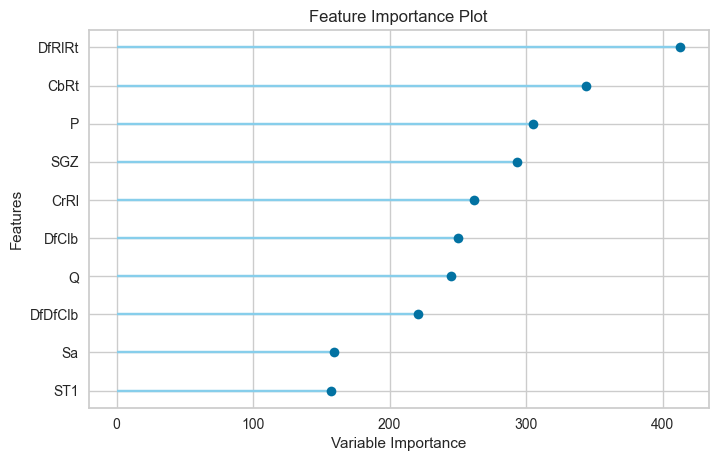

In [30]:
plot_model(tuned_lightgbm, plot='feature')

In [31]:
evaluate_model(tuned_lightgbm)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
predict_model(tuned_lightgbm)

CbRt   SGZ     P     Q  CrRl  DfClb  DfRlRt  DfDfClb     ST1     ST3  \
0     -22.0 -16.0  0.44 -0.04  -0.4    5.0   0.001      0.1 -0.0004 -0.0004   
1     292.0 -36.0 -0.31 -0.12   0.1   14.0   0.012      0.2 -0.0002 -0.0002   
2      16.0  15.0  0.14  0.12   0.0  -13.0   0.001     -0.2 -0.0004 -0.0004   
3    -136.0 -25.0 -0.52 -0.11   0.4   18.0  -0.012      0.4 -0.0010 -0.0010   
4    -712.0  51.0  0.32  0.00   0.7   -8.0  -0.007      3.5 -0.0007 -0.0006   
...     ...   ...   ...   ...   ...    ...     ...      ...     ...     ...   
1196 -250.0 -32.0  0.48 -0.12   0.5    7.0   0.008      2.9 -0.0007 -0.0007   
1197 -123.0  41.0  0.17  0.13   0.3  -14.0   0.002     -0.1 -0.0003 -0.0003   
1198 -174.0 -48.0 -0.68 -0.13  -0.1   13.0  -0.026      1.8 -0.0005 -0.0007   
1199  -55.0 -10.0 -0.22 -0.05   0.4    9.0   0.002     -0.7 -0.0005 -0.0005   
1200  449.0   2.0  0.35 -0.05   0.3   10.0   0.012     -0.3 -0.0004 -0.0004   

      ...  AbRl_-4  AbRl_-5  AbRl_-6  AbRl_-7  AbRl_-8  AbRl_-9  DfST2_0  \
0     ...      0.0      0.0      1.0      0.0      0.0      0.0      1.0   
1     ...      0.0      0.0      1.0      0.0      0.0      0.0      1.0   
2     ...      0.0      0.0      1.0      0.0      0.0      0.0      1.0   
3     ...      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
4     ...      0.0      0.0      0.0      1.0      0.0      0.0      1.0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
1196  ...      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1197  ...      0.0      0.0      1.0      0.0      0.0      0.0      1.0   
1198  ...      0.0      0.0      0.0      1.0      0.0      0.0      1.0   
1199  ...      0.0      0.0      0.0      0.0      1.0      0.0      1.0   
1200  ...      0.0      0.0      0.0      0.0      0.0      0.0      1.0   

      DfST4_0  Target     Label  
0         1.0   0.018  0.016763  
1         1.0   0.017  0.017331  
2         1.0   0.019  0.019345  
3         1.0   0.017  0.016070  
4         1.0   0.024  0.019742  
...       ...     ...       ...  
1196      1.0   0.022  0.022467  
1197      1.0   0.018  0.018515  
1198      1.0   0.015  0.015956  
1199      1.0   0.016  0.017810  
1200      1.0   0.018  0.020055  

[1201 rows x 37 columns]

In [33]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [34]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=80,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=33, objective=None,
              random_state=4526, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [41]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head(35)

CbRt  SGZ     P     Q  CrRl  AbRl  DfClb  DfRlRt  DfDfClb     ST1     ST2  \
0    212  -16  0.05  0.12  -0.6   -14      4   0.006     -1.7 -0.0007 -0.0007   
1    -87  -14 -0.55 -0.02   0.3   -10      9  -0.018      0.2 -0.0009 -0.0010   
2    389   -9  0.41  0.08   1.6    -5     -6  -0.005     -0.6 -0.0004 -0.0004   
3    129  -23 -0.07  0.20  -0.7   -21      2   0.008     -0.2 -0.0013 -0.0014   
4     33   -4 -0.34  0.07   1.1   -12     -3  -0.010      0.0 -0.0009 -0.0009   
5   -199    5 -0.17  0.04   0.2    -6     -4  -0.003      0.0 -0.0004 -0.0004   
6   -229   19  0.20  0.09   1.6    -4    -10  -0.008     -0.1 -0.0004 -0.0004   
7   -222  -28  0.12  0.11  -0.9   -11     -6   0.010     -0.2 -0.0009 -0.0008   
8    225  -45  0.45  0.04  -0.3   -10     10   0.007     -0.8 -0.0007 -0.0006   
9    -25  -42 -0.68  0.00  -0.4   -10      5   0.013     -1.1 -0.0005 -0.0005   
10  -348  -15  0.19  0.11  -0.2   -10     -3   0.002     -1.2 -0.0006 -0.0006   
11  -112   -9 -0.22 -0.02  -0.8   -11      6   0.001     -0.1 -0.0007 -0.0007   
12  -367  -15  0.53  0.24   1.6   -11     -3  -0.032     -2.1 -0.0012 -0.0012   
13  -618  -42 -0.29  0.07   1.2    -5     -4  -0.002     -0.6 -0.0004 -0.0004   
14   124   26  0.08  0.03  -0.3    -7     -2   0.006     -0.1 -0.0003 -0.0003   
15   -89   15  0.28  0.04   1.0    -5     -4  -0.004     -0.1 -0.0004 -0.0003   
16    -4  -40 -0.66 -0.11   0.1   -11     12  -0.022      2.0 -0.0007 -0.0009   
17   -11   -7  0.32 -0.06  -0.5    -7      8   0.006     -0.1 -0.0003 -0.0003   
18   305   24  0.13  0.20   0.6   -14    -12  -0.006     -0.1 -0.0011 -0.0011   
19  -182    8  0.24  0.14  -0.4    -7    -14   0.010     -0.2 -0.0003 -0.0003   
20  -404  -11 -0.02  0.12   1.0   -19      3  -0.023      0.4 -0.0018 -0.0018   
21  -298   -5 -0.08  0.11  -0.3   -10     -9   0.016     -0.1 -0.0004 -0.0004   
22  -144   -4 -0.24  0.05   0.5    -6     -6  -0.004      0.0 -0.0004 -0.0004   
23  -312  -43  0.34  0.10  -2.0   -12     -5   0.013     -0.1 -0.0005 -0.0005   
24   -16  -20 -0.55 -0.02   0.4   -10      5  -0.019     -0.1 -0.0010 -0.0010   
25   110  -11  0.68  0.02  -0.4   -10      2  -0.001     -0.1 -0.0006 -0.0006   
26   255  -14 -0.41  0.32   0.1   -19    -12  -0.016     -3.2 -0.0014 -0.0014   
27   -26  -53 -0.44  0.04  -1.0    -7     -4   0.001      0.1 -0.0005 -0.0005   
28  -124  -61 -0.31 -0.03  -1.8   -14      8  -0.003      1.0 -0.0005 -0.0008   
29  -542  -15 -0.28  0.02  -0.5    -7      1  -0.001     -0.1 -0.0006 -0.0006   
30   -85   10  0.39 -0.24  -0.5   -12     27   0.011      2.5 -0.0006 -0.0005   
31  -348  -12 -0.20  0.10  -0.7   -17      4   0.005      0.0 -0.0012 -0.0013   
32   -91   -9 -0.02 -0.09  -3.0   -10     14   0.026     -0.2 -0.0002 -0.0002   
33  -440  -16  0.31  0.11  -0.9   -11     -9   0.008      0.1 -0.0005 -0.0005   
34    -3  -17 -0.52  0.11   1.5    -9     -9  -0.015     -0.1 -0.0010 -0.0010   

       ST3     ST4   DfST1  DfST2   DfST3  DfST4      Sa  Target     Label  
0  -0.0007 -0.0007  0.0001      0  0.0000      0 -0.0007   0.021  0.021112  
1  -0.0010 -0.0010  0.0001      0  0.0000      0 -0.0010   0.021  0.020318  
2  -0.0004 -0.0004  0.0000      0  0.0000      0 -0.0004   0.020  0.020370  
3  -0.0014 -0.0014  0.0001      0  0.0000      0 -0.0014   0.031  0.032627  
4  -0.0009 -0.0009  0.0001      0  0.0000      0 -0.0009   0.019  0.018515  
5  -0.0004 -0.0004  0.0000      0  0.0000      0 -0.0004   0.016  0.016500  
6  -0.0004 -0.0004  0.0000      0  0.0000      0 -0.0004   0.020  0.018346  
7  -0.0008 -0.0007 -0.0002      0 -0.0002      0 -0.0007   0.032  0.031954  
8  -0.0006 -0.0005 -0.0002      0 -0.0002      0 -0.0005   0.021  0.019588  
9  -0.0005 -0.0005  0.0000      0  0.0000      0 -0.0005   0.016  0.016963  
10 -0.0006 -0.0006  0.0000      0 -0.0002      0 -0.0006   0.021  0.018831  
11 -0.0007 -0.0007  0.0000      0  0.0000      0 -0.0007   0.019  0.018880  
12 -0.0012 -0.0012  0.0000      0  0.0000      0 -0.0012   0.020  0.020687  
13 -0.000

In [40]:
df_test_no_Id = df_test.loc[:, df_test.columns!='Id'].copy()

df_test_no_Id

CbRt  SGZ     P     Q  CrRl  AbRl  DfClb  DfRlRt  DfDfClb     ST1  \
0    -176  -42  0.09  0.03  -0.3   -18     13   0.023      0.0 -0.0007   
1    -363   29  0.10  0.16   1.5   -11    -14  -0.004      0.0 -0.0007   
2    -181  -28 -0.20  0.07  -0.7    -9     -6  -0.005      0.3 -0.0009   
3    -241    9  0.31  0.09  -0.4   -14     -1   0.012      0.1 -0.0008   
4       5  -26 -0.22  0.01   0.4    -8      3  -0.010     -0.6 -0.0005   
..    ...  ...   ...   ...   ...   ...    ...     ...      ...     ...   
995  -108  -20 -0.29  0.18  -0.3   -16     -6   0.005     -0.2 -0.0012   
996  -181  -24  0.32 -0.01   0.0    -7     -4  -0.004      0.2 -0.0005   
997    71  -24 -0.38 -0.04   0.3    -6      5  -0.004      0.0 -0.0004   
998  -573    0  0.24  0.13   0.4   -13    -10  -0.004      0.1 -0.0008   
999    87  -39  0.44  0.06  -0.3   -13      2  -0.007     -0.8 -0.0008   

        ST2     ST3     ST4   DfST1  DfST2   DfST3  DfST4      Sa  
0   -0.0007 -0.0007 -0.0007  0.0000      0  0.0000      0 -0.0007  
1   -0.0007 -0.0007 -0.0007  0.0000      0  0.0000      0 -0.0007  
2   -0.0012 -0.0012 -0.0012  0.0003      0  0.0000      0 -0.0012  
3   -0.0007 -0.0007 -0.0007 -0.0002      0  0.0000      0 -0.0007  
4   -0.0006 -0.0006 -0.0007  0.0001      0  0.0001      0 -0.0007  
..      ...     ...     ...     ...    ...     ...    ...     ...  
995 -0.0012 -0.0012 -0.0012  0.0000      0  0.0000      0 -0.0012  
996 -0.0005 -0.0005 -0.0005  0.0000      0 -0.0001      0 -0.0005  
997 -0.0004 -0.0004 -0.0005  0.0000      0  0.0000      0 -0.0005  
998 -0.0008 -0.0008 -0.0008  0.0000      0  0.0000      0 -0.0008  
999 -0.0008 -0.0008 -0.0008  0.0000      0  0.0000      0 -0.0008  

[1000 rows x 18 columns]

In [39]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Target, unseen_predictions.Label, 'RMSEL')

AttributeError: 'DataFrame' object has no attribute 'Price'

In [36]:
df_test=pd.read_csv(r'C:\Users\marci\DataScience\Pitch_predictions\pitch-aileron\test.csv')

In [37]:
df_test_no_Id = df_test.loc[:, df_test.columns!='Id'].copy()

df_test_no_Id

CbRt  SGZ     P     Q  CrRl  AbRl  DfClb  DfRlRt  DfDfClb     ST1  \
0    -176  -42  0.09  0.03  -0.3   -18     13   0.023      0.0 -0.0007   
1    -363   29  0.10  0.16   1.5   -11    -14  -0.004      0.0 -0.0007   
2    -181  -28 -0.20  0.07  -0.7    -9     -6  -0.005      0.3 -0.0009   
3    -241    9  0.31  0.09  -0.4   -14     -1   0.012      0.1 -0.0008   
4       5  -26 -0.22  0.01   0.4    -8      3  -0.010     -0.6 -0.0005   
..    ...  ...   ...   ...   ...   ...    ...     ...      ...     ...   
995  -108  -20 -0.29  0.18  -0.3   -16     -6   0.005     -0.2 -0.0012   
996  -181  -24  0.32 -0.01   0.0    -7     -4  -0.004      0.2 -0.0005   
997    71  -24 -0.38 -0.04   0.3    -6      5  -0.004      0.0 -0.0004   
998  -573    0  0.24  0.13   0.4   -13    -10  -0.004      0.1 -0.0008   
999    87  -39  0.44  0.06  -0.3   -13      2  -0.007     -0.8 -0.0008   

        ST2     ST3     ST4   DfST1  DfST2   DfST3  DfST4      Sa  
0   -0.0007 -0.0007 -0.0007  0.0000      0  0.0000      0 -0.0007  
1   -0.0007 -0.0007 -0.0007  0.0000      0  0.0000      0 -0.0007  
2   -0.0012 -0.0012 -0.0012  0.0003      0  0.0000      0 -0.0012  
3   -0.0007 -0.0007 -0.0007 -0.0002      0  0.0000      0 -0.0007  
4   -0.0006 -0.0006 -0.0007  0.0001      0  0.0001      0 -0.0007  
..      ...     ...     ...     ...    ...     ...    ...     ...  
995 -0.0012 -0.0012 -0.0012  0.0000      0  0.0000      0 -0.0012  
996 -0.0005 -0.0005 -0.0005  0.0000      0 -0.0001      0 -0.0005  
997 -0.0004 -0.0004 -0.0005  0.0000      0  0.0000      0 -0.0005  
998 -0.0008 -0.0008 -0.0008  0.0000      0  0.0000      0 -0.0008  
999 -0.0008 -0.0008 -0.0008  0.0000      0  0.0000      0 -0.0008  

[1000 rows x 18 columns]

In [38]:
df_test_scaled = pd.DataFrame(ss.fit_transform(df_test_no_Id),columns = df_test_no_Id.columns)

NameError: name 'ss' is not defined

In [ ]:
y_hats = model.predict(df_test_scaled)

df_test['prediction'] = y_hats

df_out = pd.merge(df_test, df_test[['prediction']], how = 'left', left_index = True, right_index = True)

In [ ]:
result = df_out[['Id', 'prediction_x']]

In [ ]:
results = result.rename(columns={'prediction_x':'Target'})

results.to_csv('Result_cat.csv', index = False)